# Integrating Spotify API To access information

### accessing data from previous analysis

you streamed for 36130 minutes this year
you have listened to 1113 different artists
artistName
Karan Aujla         1814.177567
The Local Train     1054.294383
AP Dhillon          1024.293200
Atif Aslam          1000.012267
Anuv Jain            927.011167
Shubh                921.290250
Sidhu Moose Wala     770.701567
Satinder Sartaaj     677.235233
The Yellow Diary     567.237783
AUR                  563.832033
d4vd                 538.721400
Diljit Dosanjh       515.668317
Hasan Raheem         488.987450
Babbu Maan           447.796117
Parmish Verma        427.328867
Talha Anjum          414.844900
Gurinder Gill        379.414483
Rajvir Jawanda       375.180833
Vismay Patel         351.805233
Djo                  347.477467
Name: msPlayed, dtype: float64


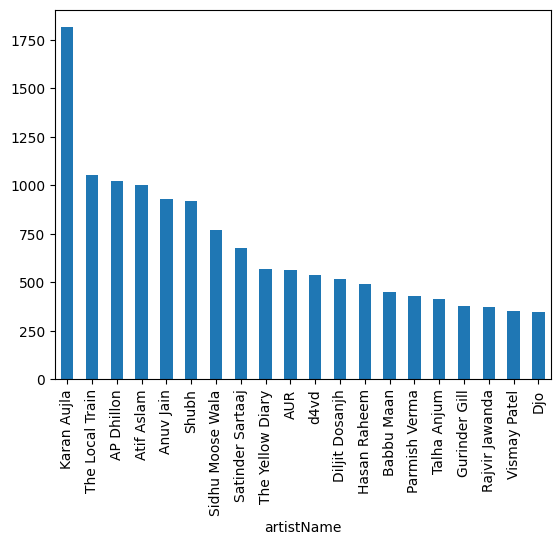

Your top artist of the year was Karan Aujla with a total of 1814 minutes of streaming
trackName
Aaoge Tum Kabhi                                    635.240833
Tu hai kahan                                       549.482167
Roz Roz                                            548.357617
Udaarian                                           545.363483
Husn                                               486.987950
Here With Me                                       482.486117
Wishes                                             475.501917
Tera Hone Laga Hoon                                437.336267
Admirin' You (feat. Preston Pablo)                 417.276367
End of Beginning                                   347.477467
Pal Behta Jaaye                                    342.215083
Downers At Dusk                                    340.485483
Choo Lo                                            317.414983
Mi Amor                                            314.592683
Something About You                 

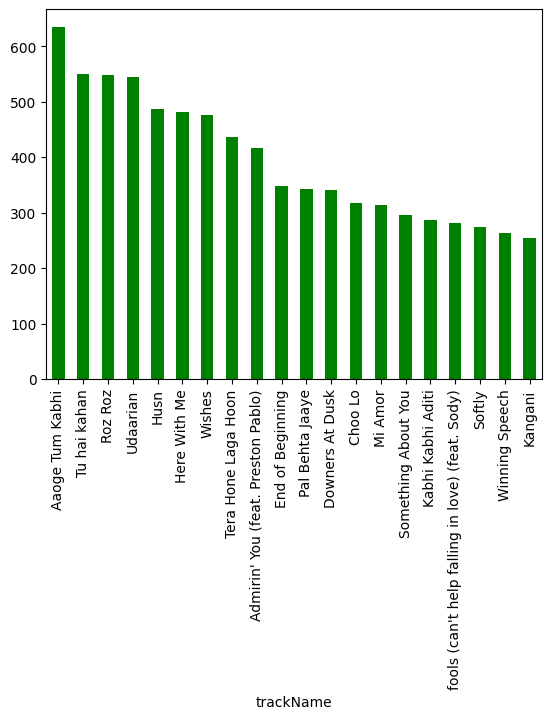

Your top song by time of the year was Aaoge Tum Kabhi with a total of 635 minutes of streaming
date
2024-09-09    395.394533
2024-02-18    370.371750
2024-04-29    358.071533
2024-09-19    351.293500
2024-03-14    322.794667
                 ...    
2024-10-27      0.231933
2024-04-07      0.209667
2024-04-23      0.204167
2024-02-03      0.151833
2023-12-19      0.066767
Name: msPlayed, Length: 361, dtype: float64


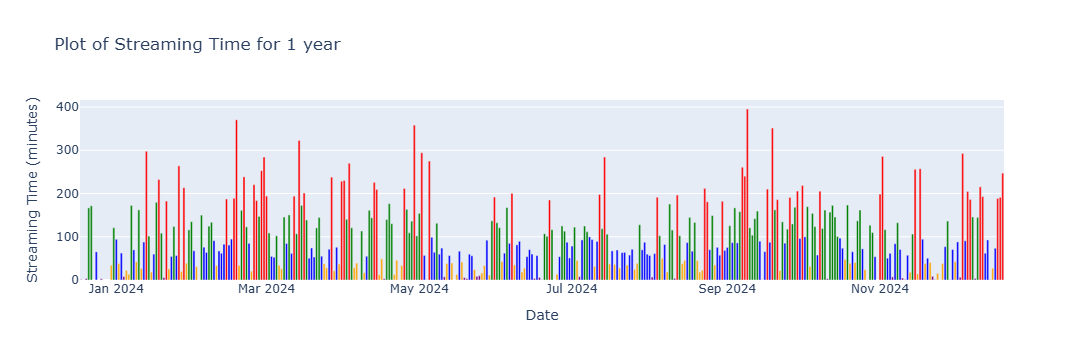

You maximum streamed day was September 09, 2024 you streamed for 395 minutes on that day
You minimum streamed day was December 19, 2023 you streamed for 0 minutes on that day
year_month
2024-09    73.672124
2024-02    60.895929
2024-04    57.259554
2024-03    56.401705
2024-10    52.318303
2024-01    50.512957
2024-08    46.528301
2024-07    42.307125
2024-12    41.598439
2024-11    38.196217
2024-06    37.744912
2024-05    35.305919
2023-12     9.429754
Freq: M, Name: msPlayed, dtype: float64


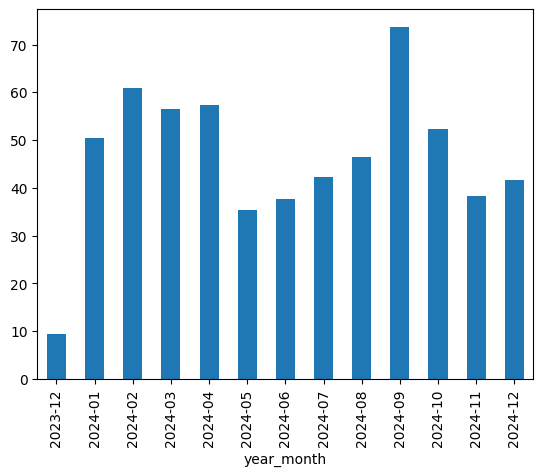

your maximum streaming month was September, 2024 with 73.67 hours of streaming
your minimum streaming month was December, 2023 with 9.43 hours of streaming
your song completion percentage(i.e songs listened for more than 25 sec) is 78.09 percent


In [147]:
%run "G:\Desktop\python\pandas\spotify_streaming_data_analysis.ipynb"

# Top Artist

In [144]:
from PIL import Image, ImageDraw, ImageFont
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import requests
from io import BytesIO

# Authentication setup (replace with your credentials)
client_credentials_manager = SpotifyClientCredentials(client_id='put your client id', client_secret='put your client secret')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Function to get artist details from Spotify
def get_artist_details(artist_name):
    result = sp.search(q=artist_name, limit=1, type='artist')
    artist = result['artists']['items'][0]
    
    artist_name = artist['name']
    artist_genres= artist['genres'][0]
    artist_image_url = artist['images'][0]['url']  # Largest image size
    artist_minutes_listened= int(top_artists[artist_name])
    
    return artist_name, artist_genres, artist_image_url , artist_minutes_listened

# Function to overlay text and images on the template
def artist_overlay_on_template(template_path ,artist_name, artist_image_url, artist_minutes_listened):
    # Opening the template image
    template = Image.open(template_path)
    
    # Downloading the artist's image
    response = requests.get(artist_image_url)
    artist_image = Image.open(BytesIO(response.content))
    
    # Resizing the artist's image to fit the template (adjust size as needed)
    artist_image = artist_image.resize((591, 636))  # Resize to a specific size
    
    # Position to place the artist image (customize based on template design)
    image_position = (245, 195) 
    
    # Paste the artist image onto the template
    template.paste(artist_image, image_position)

    # Prepare the text to overlay (artist name and genres)
    artist_name_text = artist_name
    minutes_listened_text = str(artist_minutes_listened)
    draw = ImageDraw.Draw(template)
    
    # Load a custom font and set size
    font_path = "font.otf"
    numeric_font_path= "numeric_font.otf"# Replace with the path to a TTF font file
    artist_name_font = ImageFont.truetype(font_path, 70)  # Font size 50
    minutes_listened_font = ImageFont.truetype(numeric_font_path, 90)

    # Position for artist name
    artist_name_position = (335,1210)
    draw.text(artist_name_position, artist_name_text, font=artist_name_font, fill=(255, 255, 255))  # White text

    # Position for minutes listened
    minutes_listened_position = (440, 1430)
    draw.text(minutes_listened_position , minutes_listened_text, font=minutes_listened_font, fill=(255, 255, 255))  # White text

    # Save or display the final image
    template.show()  # Display the image

template_path = "top_artist_and_minutes.png"  

artist_name, artist_genres, artist_image_url ,artist_minutes_listened  = get_artist_details(top_artist_name)
artist_overlay_on_template(template_path, artist_name, artist_image_url, artist_minutes_listened)



# Top Song 

In [140]:
# Function to get song details from Spotify (replace 'song_name' with actual song name)
def get_song_details(song_name):
    result = sp.search(q=song_name, limit=1, type='track')
    song = result['tracks']['items'][0]
    
    song_name = song['name']
    song_streams = top_song_streams  
    album_cover_url = song['album']['images'][0]['url']  # Largest image size
    artist_name = song['artists'][0]['name']
    
    return song_name, song_streams, album_cover_url, artist_name

# Function to overlay text and images on the template
def song_overlay_on_template(template_path, song_name, song_streams, album_cover_url, artist_name):
    template = Image.open(template_path)
    
    # Download the album cover image
    album_response = requests.get(album_cover_url)
    album_cover = Image.open(BytesIO(album_response.content))
    
    # Resize the album cover image to fit the template (adjust size as needed)
    album_cover = album_cover.resize((600, 600))  # Resize to a specific size
    
    # Position to place the album cover image (customize based on template design)
    album_cover_position = (240, 195)  # Example position
    
    # Paste the album cover onto the template
    template.paste(album_cover, album_cover_position)

    # Prepare the text to overlay (song name, artist name, and streams)
    song_name_text = song_name
    song_streams_text = str(song_streams)
    artist_name_text = artist_name

    # Add text with a custom font
    draw = ImageDraw.Draw(template)
    
    # Load a custom font and set size
    font_path = "font.otf"  # Adjust path to your font
    numeric_font_path = "numeric_font.otf"  # Adjust path to your numeric font
    song_name_font = ImageFont.truetype(font_path, 100)  # Font size for song name
    song_streams_font = ImageFont.truetype(numeric_font_path, 100)  # Font size for streams
    artist_name_font = ImageFont.truetype(font_path, 50)  # Font size for artist name

    # Position for song name
    song_name_position = (340, 1100)
    draw.text(song_name_position, song_name_text, font=song_name_font, fill=(0, 0, 0))  # White text

    # Position for song streams
    song_streams_position = (460, 1470)
    draw.text(song_streams_position, song_streams_text, font=song_streams_font, fill=(0, 0, 0))  # White text

    # Save or display the final image
    template.show()  # Display the image

template_path = "top_song_total_streams.png"  
song_name = top_song  # Replace with actual song name
song_name, song_streams, album_cover_url, artist_name = get_song_details(song_name)
song_overlay_on_template(template_path, song_name, song_streams, album_cover_url, artist_name)


# Total Streaming Time

In [135]:
def song_overlay_on_template(template_path, total_streaming_time):
    # Open the template image
    template = Image.open(template_path)
    total_streaming_time_text= str(total_streaming_time)
    
    # Add text with a custom font
    draw = ImageDraw.Draw(template)
    font_path = "font.otf" 
    numeric_font_path = "numeric_font.otf" 
    total_streaming_time_font = ImageFont.truetype(numeric_font_path, 100) # Font size for artist name

    total_streaming_time_position = (540, 1020)
    draw.text(total_streaming_time_position, total_streaming_time_text, font=total_streaming_time_font, fill=(255,255,255))  # White text
    template.show()  


template_path = "total_minutes.png"  
song_overlay_on_template(template_path, total_minutes_played)


# Top 5 SONGS

In [145]:
def get_top_song_details(song_name):
    result = sp.search(q=song_name, limit=1, type='track')
    song = result['tracks']['items'][0]
    
    song_name = song['name']
    artist_name = song['artists'][0]['name']
    song_streams = song['popularity']  
    song_cover_url = song['album']['images'][0]['url'] if song['album']['images'] else None
    
    return song_name, artist_name, song_streams, song_cover_url

# Function to overlay text and images on the template
def top_songs_overlay_on_template(template_path, top_5_songs,x_offset, y_offset):
    # Open the template image
    template = Image.open(template_path)
    
    # Set initial position for the first song
    position_offset = 100
    
    # Iterate through the top 5 songs and overlay them on the template
    for song_name in top_5_songs:
        # Get song details
        song_name, artist_name, song_streams, album_cover_url = get_top_song_details(song_name)
        
        # Download the album cover image
        album_response = requests.get(album_cover_url)
        album_cover = Image.open(BytesIO(album_response.content))
        album_cover = album_cover.resize((170, 170))  # Resize the album cover image
        
        # Paste the album cover onto the template
        template.paste(album_cover, (50+x_offset, position_offset+y_offset))  # Position the album cover on the template
        
        # Prepare text for song name and artist
        song_text = song_name
        artist_text = artist_name

        # Add text to the template
        draw = ImageDraw.Draw(template)
        
        # Load fonts
        font_path = "font.otf" 
        light_font_path = "light_font.otf"# Replace with your font file path
        song_font = ImageFont.truetype(font_path, 30)
        artist_font = ImageFont.truetype(light_font_path, 30)

        song_name_position = (245 + x_offset, position_offset + 10 + y_offset)
        artist_name_position = (245 + x_offset, position_offset + 55 + y_offset)
        
        # Overlay text on the template
        draw.text(song_name_position, song_text, font=song_font, fill=(0, 0, 0))
        draw.text(artist_name_position, artist_text, font=artist_font, fill=(0, 0, 0))
        
        # Adjust position for the next song
        position_offset += 250  # Move down for the next song

    # Convert the image to RGB mode before saving as JPEG (removes the alpha channel)
    template = template.convert("RGB")
    
    # Save the final image with all songs displayed on the same template
    template.save("top_5_songs_image.jpg")  # Save the output image to a file
    template.show()  # Display the final image


template_path = "top_songs.png"
x_offset = 130  # horizontal shift
y_offset = 400  # vertical shift
top_songs_overlay_on_template(template_path, top_5_songs_names,x_offset,y_offset)

# Top 5 artist and Top 5 Artists 

In [143]:
from PIL import Image, ImageDraw, ImageFont
import requests
from io import BytesIO

def get_top_song_details(song_name):
    result = sp.search(q=song_name, limit=1, type='track')
    song = result['tracks']['items'][0]
    
    song_name = song['name']
    artist_name = song['artists'][0]['name']
    song_streams = song['popularity']  
    
    return song_name, artist_name, song_streams

def top_songs_overlay_on_template(template_path, top_5_songs, top_5_artists, minutes_listened, x_offset=50, y_offset=50):
    
    template = Image.open(template_path)
    # 1. top artist image
    response = requests.get(artist_image_url)
    artist_image = Image.open(BytesIO(response.content))
    artist_image = artist_image.resize((530, 620))  
    image_position = (275, 190)  
    template.paste(artist_image, image_position)
    draw = ImageDraw.Draw(template)
    
    font_path = "font.otf"
    numeric_font_path="numeric_font.otf"
    artist_font = ImageFont.truetype(font_path, 40)
    song_font = ImageFont.truetype(font_path, 40)
    
    # 2. Display Top 5 Artists on Left
    position_offset = 1107  # change it to move it vertically
    for artist_name in top_5_artists:
        artist_name_position = (x_offset+70, position_offset)
        draw.text(artist_name_position, artist_name, font=artist_font, fill=(255, 255, 255))
        position_offset += 49  # Move down for the next artist
    
    # 3. Display Top 5 Songs on Right
    position_offset = 1107  # change it to move it vertically
    for song_name in top_5_songs:
        song_name, artist_name, song_streams = get_top_song_details(song_name)
        
        song_name_position = (template.width - 476, position_offset)
        draw.text(song_name_position, song_name, font=song_font, fill=(255, 255, 255))
        position_offset += 49 
    
    # 4. Display Total Streaming Time at the Bottom
    streaming_time_text = minutes_listened # minutes_listened is the taken from previos data analysis 
    streaming_time_position = (template.width // 2 - 460, template.height - 450)
    
    small_font = ImageFont.truetype(numeric_font_path, 85)
    draw.text(streaming_time_position, streaming_time_text, font=small_font, fill=(255, 255, 255))
    template = template.convert("RGB")
    
    template.save("top_5_songs_image.jpg")
    template.show()  # Display the final image

template_path = "top_artists_top_songs_minutes_listened.png" 
top_songs_overlay_on_template(template_path, top_5_songs_names, top_5_artist_names, str(total_minutes_played))
